### Notebook Summary

This notebook applies a Decision Tree Classifier to predict the outcome of Premier League football matches using betting odds data. The task involves:

- Loading and exploring the cleaned dataset.
- Selecting relevant numeric features: average odds for home win, draw, and away win.
- Defining the target variable (`home_outcome`), which represents the actual result of the match.
- Splitting the dataset into training and test sets using `train_test_split`.
- Training a decision tree with a maximum depth of 5.
- Evaluating the model using accuracy, a confusion matrix, and a classification report to assess its predictive performance.
- Visualizing the trained decision tree using Graphviz to understand how the model makes decisions based on the input features.

This Notebook demonstrates a basic supervised classification workflow suitable for introductory machine learning tasks involving categorical outcomes.


### Import libraries

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz


### Load the Dataset

In [150]:
df = pd.read_csv("data/cleaned-premier-league-data.csv")


print(df.head())


print(df.shape)
print(df.info())


         date  home_team  away_team  home_outcome  avg_odd_home_win  \
0  08/08/2015          2          1             0             7.024   
1  08/08/2015          6         22             1             6.697   
2  08/08/2015          8         24             1             6.842   
3  08/08/2015         12         21             2             7.000   
4  08/08/2015         15         23             2             6.477   

   avg_odd_draw  avg_odd_away_win  home_ranking  away_ranking  \
0         3.303             3.748            20            17   
1         4.338             8.967             1             8   
2         3.514             4.852            11            20   
3         3.207             3.742            14            16   
4         3.651             5.318             4             5   

   last_home_result  last_away_result  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0   

### Explore and Understand the Data

         home_team    away_team  home_outcome  avg_odd_home_win  avg_odd_draw  \
count  1246.000000  1246.000000   1246.000000       1246.000000   1246.000000   
mean     13.856340    13.745586      1.133226          7.274838      4.441469   
std       8.224427     8.194932      0.851120          1.043937      1.647506   
min       0.000000     0.000000      0.000000          5.463000      2.935000   
25%       7.000000     7.000000      0.000000          6.492000      3.250000   
50%      14.000000    14.000000      1.000000          7.056000      3.535000   
75%      21.000000    21.000000      2.000000          7.885250      6.383250   
max      27.000000    27.000000      2.000000         10.355000      9.088000   

       avg_odd_away_win  home_ranking  away_ranking  last_home_result  \
count       1246.000000   1246.000000   1246.000000       1246.000000   
mean           3.684693     11.274478     10.603531         -0.089888   
std            1.604586      5.768083      5.902701

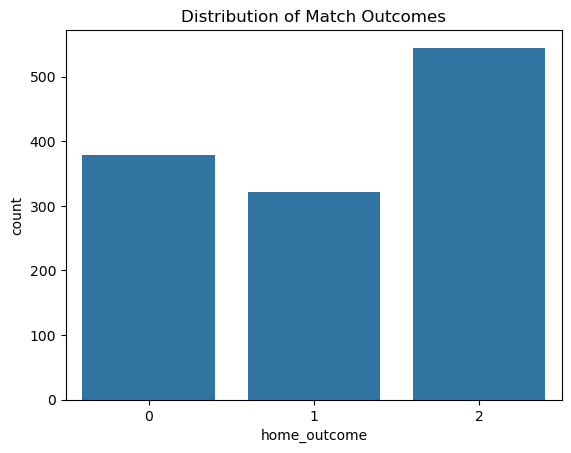

In [151]:
# Basic stats
print(df.describe())

# Visualize how often each outcome (Home Win, Draw, Away Win) occurs
sns.countplot(x='home_outcome', data=df)
plt.title("Distribution of Match Outcomes")
plt.show()

### Define Features and Labels

In [152]:
# Use 3 average betting odds as input features
features = ['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win']
X = df[features]

# Define the target variable — the actual match outcome
y = df['home_outcome']

### Train-Test Split

In [153]:
# Split the data into training and test sets (80% train / 20% test)
# Stratify ensures class proportions are the same in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

### Train the Decision Tree Model

In [154]:
# Create decision tree with max depth 5 to prevent overfitting
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train on training set
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

### Evaluate the Model

In [155]:
# Predict on test set
y_pred = clf.predict(X_test)

# Accuracy (overall correct predictions)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Show confusion matrix to compare actual vs. predicted values
cm = confusion_matrix(y_test, y_pred)
cm


Accuracy: 0.492


array([[36, 15, 25],
       [19, 17, 29],
       [17, 22, 70]], dtype=int64)

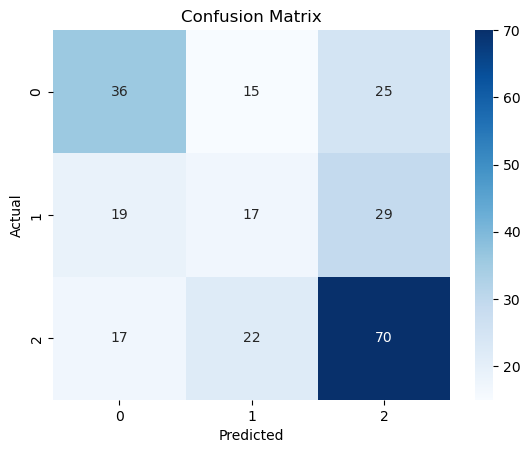

              precision    recall  f1-score   support

           0       0.50      0.47      0.49        76
           1       0.31      0.26      0.29        65
           2       0.56      0.64      0.60       109

    accuracy                           0.49       250
   macro avg       0.46      0.46      0.46       250
weighted avg       0.48      0.49      0.48       250



In [156]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Detailed Report in form of precision, recall, F1-score, and support for each class
print(classification_report(y_test, y_pred))

**Confusion Matrix Analysis**

The model performs best when predicting **Away Wins**, correctly identifying 70 matches. However, it struggles with the other outcomes:

- **Draws:** Only 17 out of 65 actual draws were predicted correctly.
- **Home Wins:** 36 out of 76 actual home wins were correctly predicted.

This indicates the model has difficulty distinguishing **draw outcomes**, which is a common challenge in football prediction due to the ambiguous nature of draw odds and less distinguishable patterns.


Model Evaluation Explained

    Accuracy: Overall percentage of correct predictions.

    Confusion Matrix: Shows correct vs. incorrect predictions for each class.

    Classification Report:

        Precision: Correct predictions out of all predicted for a class.

        Recall: Correct predictions out of all actual instances of that class.

        F1-score: Balance between precision and recall.

        Support: Number of actual examples per class.

Includes:

    Macro avg: Equal average across classes.

    Weighted avg: Average based on class sizes (useful for imbalance).

### Visualize the Decision Tree

In [157]:
class_labels = [str(label) for label in clf.classes_]

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=features,
                           class_names=class_labels,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("premier_league_tree")  # saves as PDF
graph.view()

'premier_league_tree.pdf'

### Save model

In [ ]:
import joblib

# Save the model
joblib.dump(clf, 'decision_tree_model.pkl')